# Built Environment Conditions #

    "Built environment conditions" simply refer to any non-natural structures in a location - most often, this just refers to buildings. Obvious indicators of bad neighborhoods (ex. crime) are correlated with unkept and dilapidated buildings. For this reason, indicators of building conditions can be used as a proxy for the desirability of a neighborhood. Within this dataset, the specific indicators used are the percentage of buildings that are in good/excellent condition, in poor/derelict condition, and in a condemned condition (declared as unsafe to live in). Together, these 3 indicators provide a strong measure of the conditions of buildings in Pittsburgh neighborhoods.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading CSV file
df = pd.read_csv("https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/61a264ec-a537-42de-91e3-5752d689103d/download/built-enviornment-conditions.csv")

# Dropping rows that do not have data for the specific sub-metrics I am looking at within this dataset
df = df.dropna(subset = ["% Good / Excellent Condition Buildings (2009)","% Poor / Derelict Condition Buildings (2009)", "% of all Bldgs. Condemned (2010)"])

This first part of the code is just importing the csv file and removing any neighborhoods that do not have "NA" for the metrics I am using.

In [8]:
# Normalizing the data for buildings in excellent condition
# Removing "%" from data values, converting from String to float, and dividing percentage by 100 to get a number between 0 and 1
normalized_excellent = df["% Good / Excellent Condition Buildings (2009)"].replace("%", "", regex = True)
normalized_excellent = pd.to_numeric(normalized_excellent) / 100
normalized_excellent.index = df["Neighborhood"]
normalized_excellent.sort_values(ascending = False).head(10)

Neighborhood
North Shore                  0.800
Allegheny West               0.720
Central Northside            0.429
Central Business District    0.320
Crawford-Roberts             0.276
Westwood                     0.227
Bluff                        0.222
Manchester                   0.216
East Liberty                 0.212
East Allegheny               0.209
Name: % Good / Excellent Condition Buildings (2009), dtype: float64

Using only the data for the percentage of good/excellent condition buildings, here are the top ten neighborhoods. Their scores are directly related to the percentage of good/excellent condition buildings in the neighborhood.

In [10]:
# Normalizing the data for buildings in poor condition
# Same logic as above, except the value is subtracted from 1 since higher scores are given to neighborhoods with low proportions of derelict buildings
normalized_derelict = df["% Poor / Derelict Condition Buildings (2009)"].replace("%", "", regex = True)
normalized_derelict = pd.to_numeric(normalized_derelict) / 100
normalized_derelict = 1 - normalized_derelict
normalized_derelict.index = df["Neighborhood"]
normalized_derelict.sort_values(ascending = False).head(10)

Neighborhood
Regent Square          1.000
Squirrel Hill North    1.000
Ridgemont              1.000
Squirrel Hill South    0.999
Swisshelm Park         0.999
Banksville             0.998
Lincoln Place          0.998
Bon Air                0.998
Brookline              0.998
East Carnegie          0.997
Name: % Poor / Derelict Condition Buildings (2009), dtype: float64

Using only the data for the percentage of poor/derelict condition buildings, here are the top ten neighborhoods. In the code, I use 1 minus the original proportion because neighborhoods with lower proportions of poor condition buildings should receive higher scores.

In [13]:
# Normalizing the data for condemned buildings
# Uses same logic as the normalization for buildings in poor condition
normalized_condemned = df["% of all Bldgs. Condemned (2010)"].replace("%", "", regex = True)
normalized_condemned = pd.to_numeric(normalized_condemned) / 100
normalized_condemned = 1 - normalized_condemned
normalized_condemned.index = df["Neighborhood"]
normalized_condemned.sort_values(ascending = False).head(10)

Neighborhood
Squirrel Hill North    1.0
New Homestead          1.0
Highland Park          1.0
North Shore            1.0
Friendship             1.0
Point Breeze           1.0
Regent Square          1.0
Bon Air                1.0
Ridgemont              1.0
Shadyside              1.0
Name: % of all Bldgs. Condemned (2010), dtype: float64

Using only the data for the percentage of buildings that are condemned, here are the top ten neighborhoods. Once again, I used 1 minus the original proportion for the score.

In [22]:
# New data frame created with 3 columns, each corresponding to the normalized scores created above
analysis_df = pd.DataFrame({"Score - Good Condition" : normalized_excellent, "Score - Poor Condition" : normalized_derelict, "Score - Condemned": normalized_condemned}, index = df["Neighborhood"]) 

# New column added to the analysis dataframe, which is the weighted average of the previous 3 columns
# Order of importance for the weightings (from most to least) - condemned buildings, poor conditions buildings, good condition buildings
analysis_df["Final Score"] = (analysis_df["Score - Good Condition"] * 0.35 + analysis_df["Score - Poor Condition"] * 0.3 + analysis_df["Score - Condemned"] * 0.35)

# Sort the rows by the "Final Score" column in descending order
sorted_df = analysis_df.sort_values(by = ["Final Score"], ascending = False)
sorted_df.head(10)

,Score - Good Condition,Score - Poor Condition,Score - Condemned,Final Score
Neighborhood,,,,
North Shore,0.800,0.925,1.000,0.90750
Allegheny West,0.720,0.943,0.994,0.88280
Central Northside,0.429,0.885,0.943,0.74570
Westwood,0.227,0.991,0.997,0.72570
Central Business District,0.320,0.865,1.000,0.72150
Oakwood,0.203,0.995,0.998,0.71885
Squirrel Hill North,0.176,1.000,1.000,0.71160
East Liberty,0.212,0.959,0.992,0.70910
Regent Square,0.164,1.000,1.000,0.70740


A weighted average is used to calculate this new column "Final Score". 35% weighting was given to the score for buildings in good condition, 30% was given to the score for buildings in poor condition, and 35% was given to the score for condemned buildings. Although it may seem like buildings in good condition was weighted relatively high, the combined weighting for the score of buildings in an overall bad condition far outweighed this (30% + 35% > 35%). The reasoning for this was that while it is nice to have buildings in great condition, it is far better to not have any buildings in a poor or condemned condition.

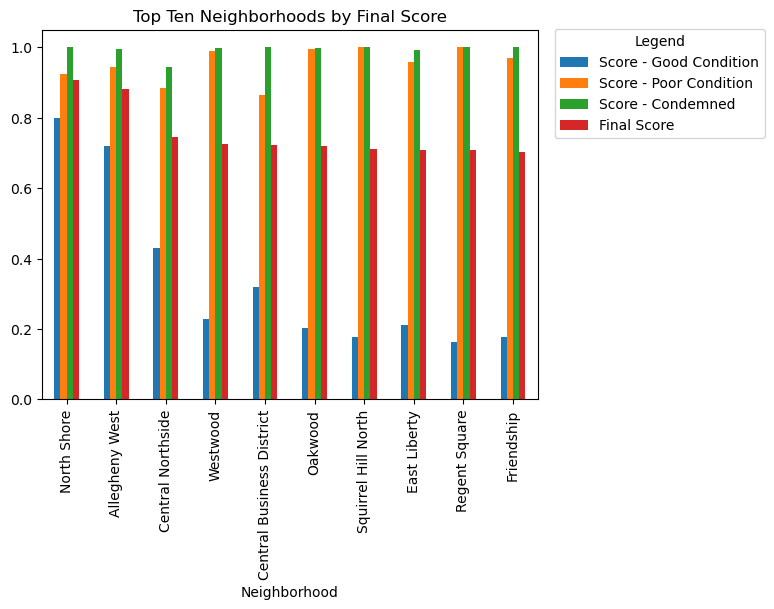

In [24]:
# Create a new data frame of just the top ten rows
data_to_plot = sorted_df.head(10)

# Plotting data in a bar graph, giving it a title, and moving the legend to a suitable position outside of the graph
data_to_plot.plot(kind = "bar")
plt.title("Top Ten Neighborhoods by Final Score")
plt.legend(title = "Legend", bbox_to_anchor = (1.02,1.02))

To better visualize the data, here is a bar chart that helps you see where each of the top ten neighborhoods ranked best on. By taking a look at this chart, you can see how the score of any of the 3 individual sub metrics affected the final score for each neighborhood.

(0.0, 1.0)

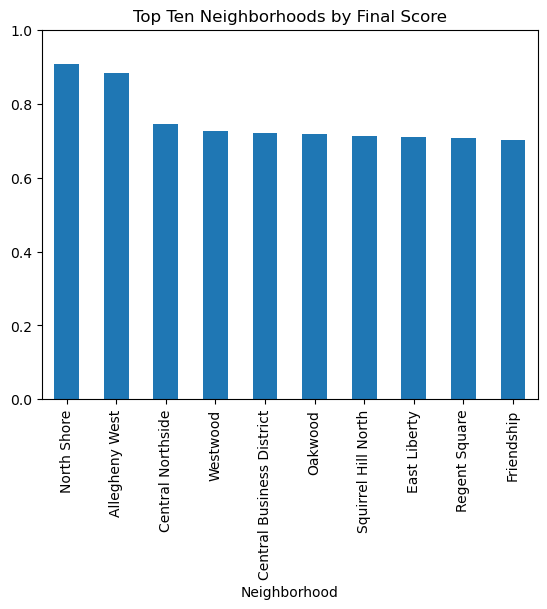

In [36]:
# Plotting only the "Final Score" column 
data_to_plot["Final Score"].plot(kind = "bar")
plt.title("Top Ten Neighborhoods by Final Score")
# Adjusting the y axis so that the upper boundary is 1.0 instead of based on the max score
plt.ylim(top = 1)

Here is a simplified version of the previous chart, where only the final scores are plotted. This should make it easier to see the differences in the overall score for each of the top ten neighborhoods.